In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_csv('covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [14]:
df = df.rename(columns={"State/UnionTerritory" : "State" })
df

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
9286,9287,09/12/20,8:00 AM,Telengana,-,-,266120,1480,275261
9287,9288,09/12/20,8:00 AM,Tripura,-,-,32169,373,32945
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173


In [16]:
df.shape

(9291, 9)

In [17]:
df.columns

Index(['Sno', 'Date', 'Time', 'State', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')

In [19]:
print(df['State'].unique())

['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya' 'Dadar Nagar Haveli'
 'Cases being reassigned to states' 'Sikkim' 'Daman & Diu'
 'Dadra and Nagar Haveli and Daman and Diu' 'Telangana' 'Telangana***'
 'Telengana***' 'Maharashtra***' 'Chandigarh***' 'Punjab***']


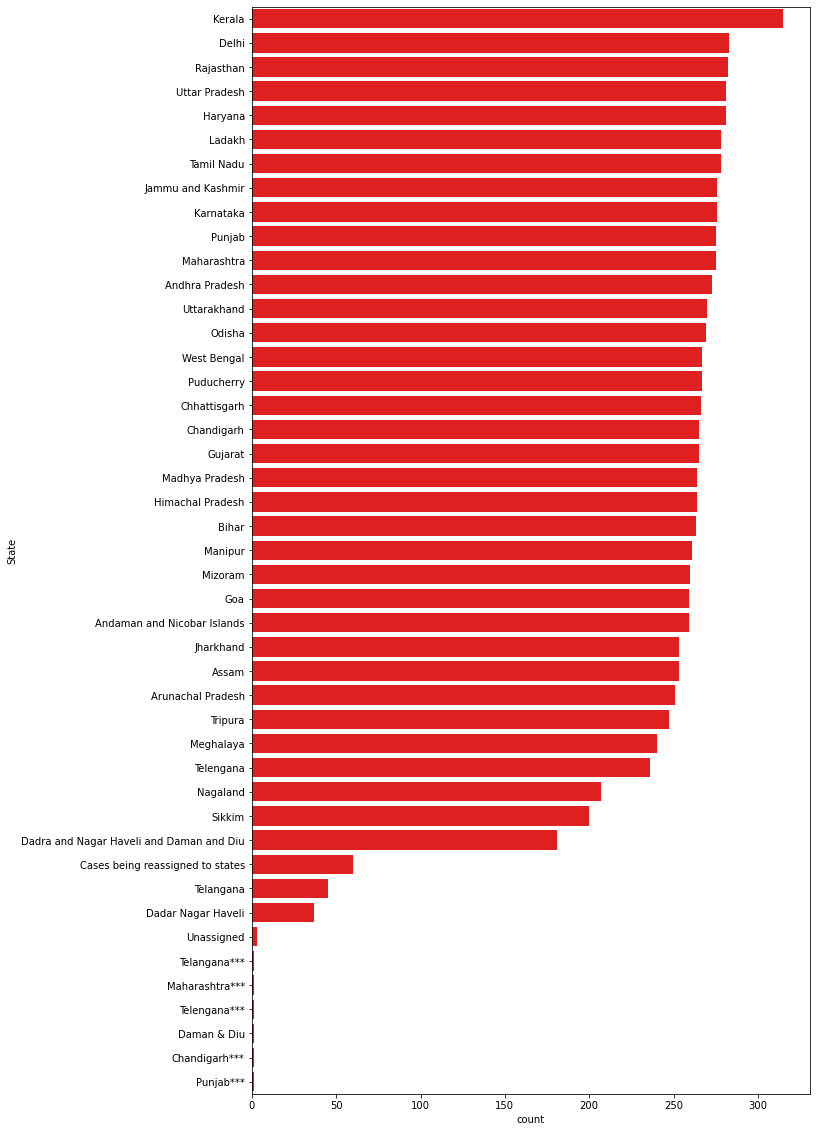

In [21]:
plt.figure(figsize=(10,20))
sns.countplot(y='State',data=df,color='r',order=df['State'].value_counts().index)
plt.show()

In [25]:
df=df[df["State"]=="Kerala"]
df.head(50)

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed


In [26]:
df.index = df['Date']

In [27]:
df['Date'] = pd.to_datetime(df['Date'],format='%d%m%y')
df.dtypes

Sno                                  int64
Date                        datetime64[ns]
Time                                object
State                               object
ConfirmedIndianNational             object
ConfirmedForeignNational            object
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

In [28]:
df = df.replace({'-': 0})

In [29]:
df["ConfirmedIndianNational"] = df["ConfirmedIndianNational"].astype(int)

In [30]:
df["ConfirmedForeignNational"] = df["ConfirmedForeignNational"].astype(int)

In [34]:
df = df[df['Date'] < "2020-04-01"]
df

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,,


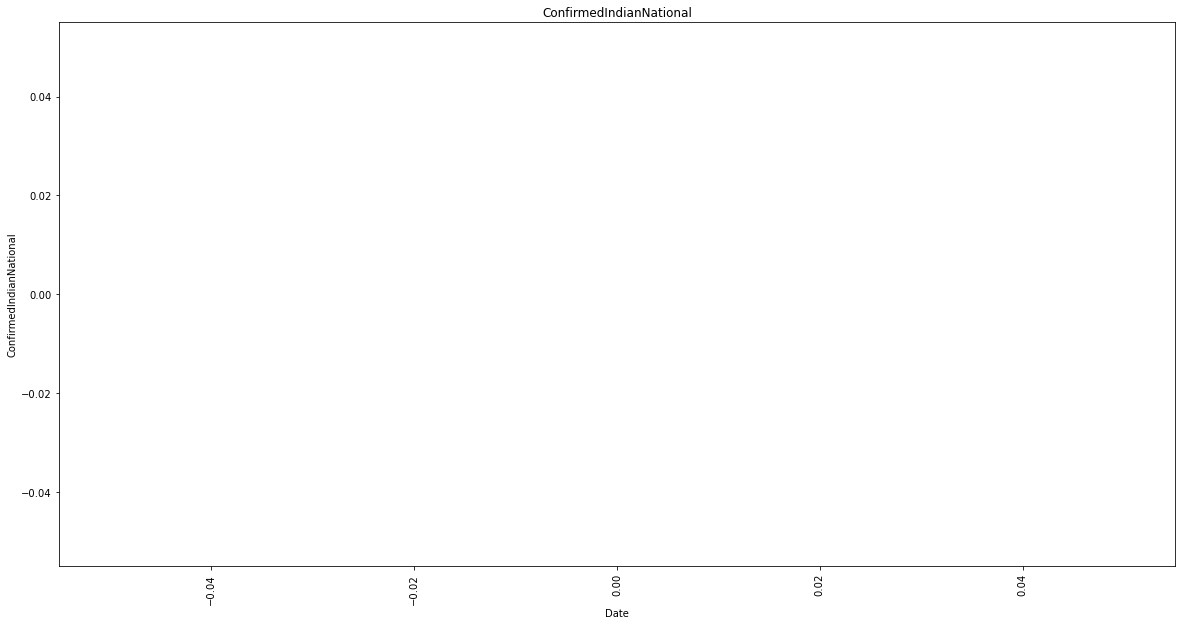

In [40]:

fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(df.index.values,
        df['ConfirmedIndianNational'],
              color='purple')
ax.set(xlabel="Date",
       ylabel="ConfirmedIndianNational",
       title="ConfirmedIndianNational")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

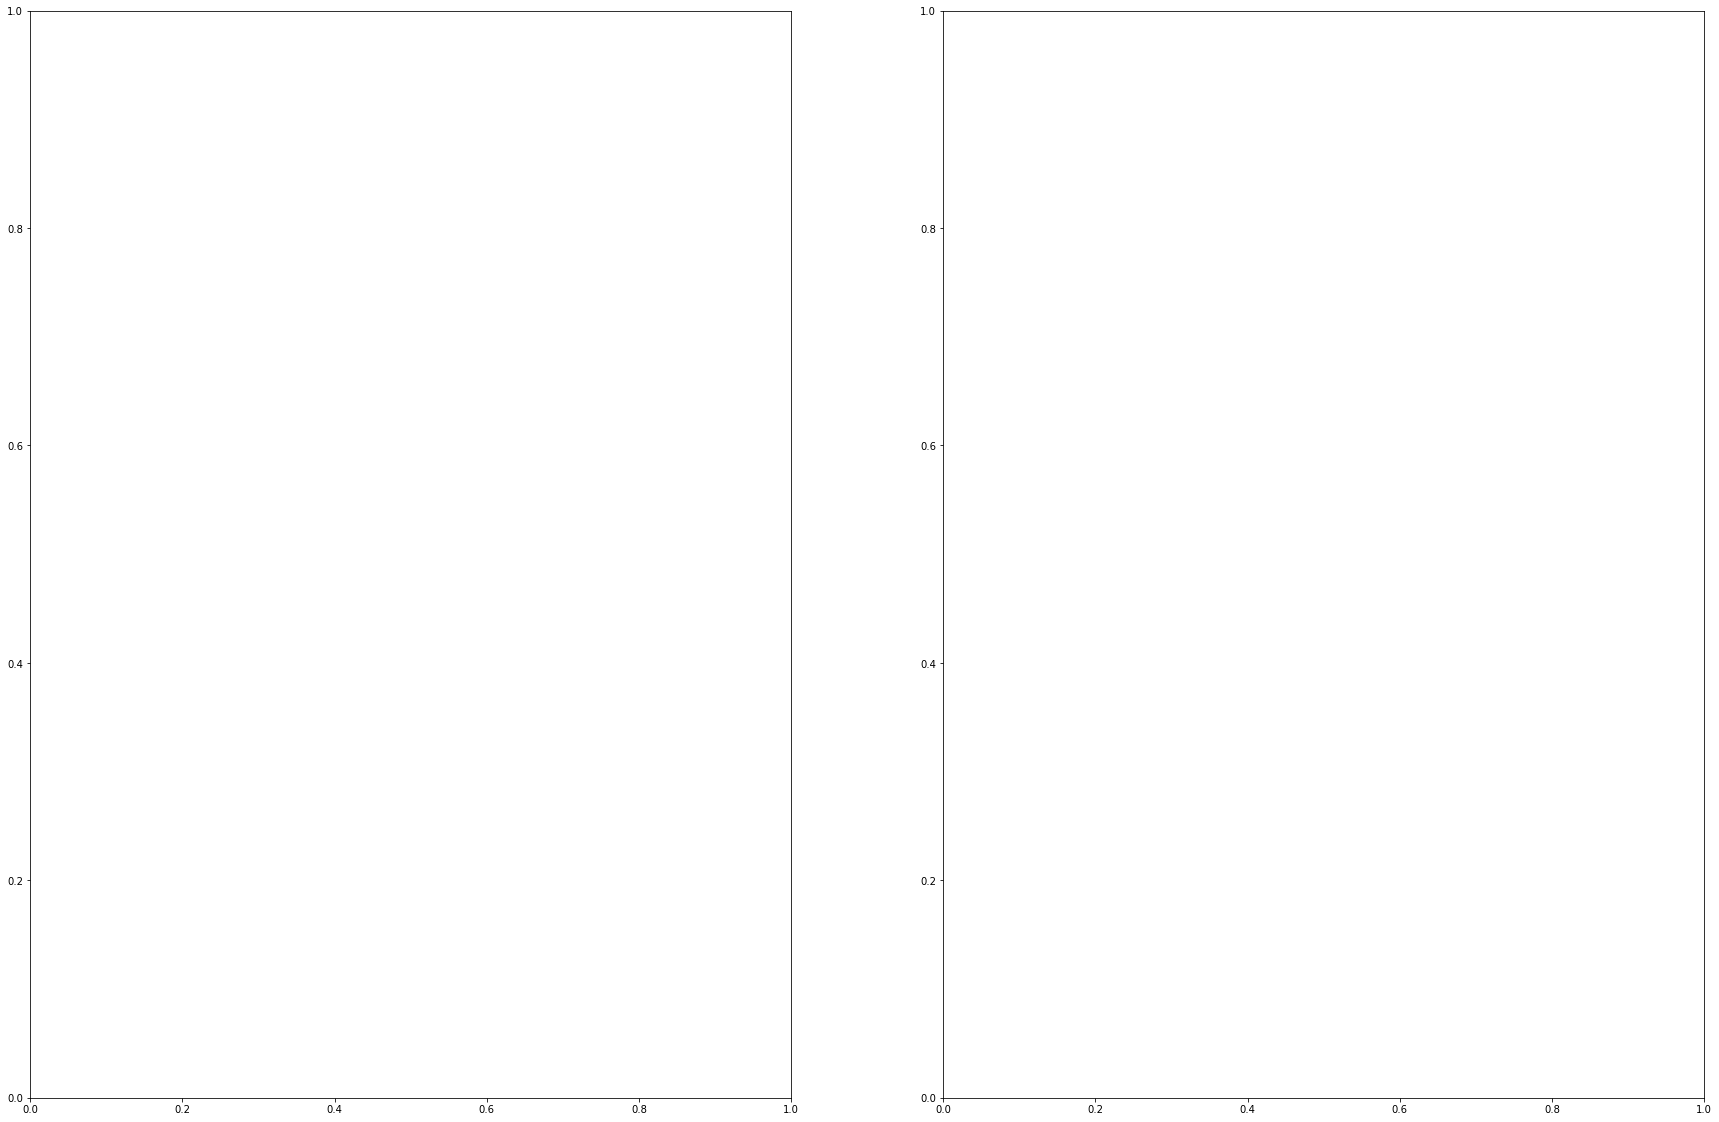

In [41]:
import seaborn as sns

f, axes = plt.subplots(1, 2, figsize=(30, 20), sharex=True)
sns.lineplot(data=df_sample, x='Date', y='ConfirmedIndianNational', hue='State', ax=axes[0])
sns.lineplot(data=df_sample, x='Date', y='ConfirmedForeignNational', hue='State', ax=axes[1])
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()